# 1. 개발 환경 세팅하기

In [1]:
! pip install koreanize_matplotlib
! pip install statsmodels

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [5]:
df_1 = "C:/Users/PC/Downloads/train_subway21.csv"
df_2 = "C:/Users/PC/Downloads/train_subway22.csv"
df_3 = "C:/Users/PC/Downloads/train_subway23.csv"
sub_df = "C:/Users/PC/Documents/codeit_study/sub_df_processed.csv"

In [6]:
try:
    df_1 = pd.read_csv(df_1, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    df_1 = pd.read_csv(df_1, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")
try:
    df_2 = pd.read_csv(df_2, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    df_2 = pd.read_csv(df_2, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")
try:
    df_3 = pd.read_csv(df_3, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    df_3 = pd.read_csv(df_3, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")
try:
    sub_df = pd.read_csv(sub_df, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    sub_df = pd.read_csv(sub_df, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")

UTF-8 인코딩으로 데이터 로드에 성공했습니다.
UTF-8 인코딩으로 데이터 로드에 성공했습니다.
UTF-8 인코딩으로 데이터 로드에 성공했습니다.
UTF-8 인코딩으로 데이터 로드에 성공했습니다.


In [17]:
# 변경하고자 하는 새 칼럼 이름 리스트
new_column_names = [
    'tm', 'line', 'station', 'number', 'name', 'direction',
    'stn', 'ta', 'wd', 'ws', 'm_day', 'm_hr1', 'hm', 'si',
    'ta_chi', 'congestion'
]
column_mapping = {}
for i, current_name in enumerate(df_2.columns):
    column_mapping[current_name] = new_column_names[i]

In [18]:
df_2.rename(columns=column_mapping, inplace=True)

In [38]:
print(df_2.columns)
print(df_1.columns)
print(df_3.columns)

Index(['Unnamed: 0', 'train_subway22.tm', 'train_subway22.line',
       'train_subway22.station_number', 'train_subway22.station_name',
       'train_subway22.direction', 'train_subway22.stn', 'train_subway22.ta',
       'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day',
       'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si',
       'train_subway22.ta_chi', 'train_subway22.congestion'],
      dtype='object')
Index(['Unnamed: 0', 'train_subway21.tm', 'train_subway21.line',
       'train_subway21.station_number', 'train_subway21.station_name',
       'train_subway21.direction', 'train_subway21.stn', 'train_subway21.ta',
       'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day',
       'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si',
       'train_subway21.ta_chi', 'train_subway21.congestion'],
      dtype='object')
Index(['Unnamed: 0', 'train_subway23.tm', 'train_subway23.line',
       'train_subway23.station_number', 'tr

In [42]:
# 칼럼명 수정
df_3.columns = [col.split('.')[-1] for col in df_3.columns]

In [40]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452143 entries, 0 to 5452142
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   tm              int64  
 2   line            int64  
 3   station_number  int64  
 4   station_name    object 
 5   direction       object 
 6   stn             int64  
 7   ta              float64
 8   wd              float64
 9   ws              float64
 10  rn_day          float64
 11  rn_hr1          float64
 12  hm              float64
 13  si              float64
 14  ta_chi          float64
 15  congestion      int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 665.5+ MB


In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# sub_df 데이터프레임이 이미 로드되어 있다고 가정합니다.
# 예시: sub_df = pd.read_csv('your_data.csv') 또는 이미 불러온 데이터프레임 사용

# 데이터프레임 인덱스 재설정 (이전 ValueError 해결을 위해 추가)
sub_df.reset_index(drop=True, inplace=True)
print("데이터프레임 인덱스 재설정 완료.")

missing_value = -99 # 'si' 칼럼에서 대체 대상 값 정의

# ----------- 1. 데이터 분할 및 특징 선택 -----------

# 'si' 값이 missing_value인 행: 예측 대상 데이터
df_predict = sub_df[sub_df['si'] == missing_value].copy()

# 'si' 값이 missing_value가 아닌 행: 훈련 데이터 후보
df_train_candidate = sub_df[sub_df['si'] != missing_value].copy()

print(f"전체 데이터 수: {len(sub_df)}")
print(f"예측 대상 행 수 (si == {missing_value}): {len(df_predict)}")
print(f"훈련 데이터 후보 행 수 (si != {missing_value}): {len(df_train_candidate)}")

# 예측 대상 데이터가 없으면 작업을 종료합니다.
if len(df_predict) == 0:
    print(f"대체할 {missing_value} 값이 'si' 칼럼에 없습니다. 작업을 종료합니다.")
else:
    # 상관관계 기반 피처 선택 (훈련 데이터 후보 사용)
    numerical_cols = sub_df.select_dtypes(include=np.number).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col not in ['si', 'Unnamed: 0']]

    # 훈련 데이터 후보에서 'si'와 다른 수치형 칼럼 간의 상관관계 계산
    correlation_matrix = df_train_candidate[numerical_cols + ['si']].corr()
    correlation_with_si = correlation_matrix['si'].abs().sort_values(ascending=False)

    print("\n'si' 칼럼과의 상관관계 (절댓값 기준):")
    print(correlation_with_si)

    # 상관관계가 높은 칼럼들을 특징으로 선택 (임계값 0.1 사용, 조정 가능)
    correlation_threshold = 0.1
    features = correlation_with_si[correlation_with_si > correlation_threshold].index.tolist()
    if 'si' in features:
        features.remove('si')

    # 만약 임계값 기준으로 선택된 특징이 없다면, 모든 수치형 칼럼 사용
    if not features:
        features = numerical_cols
        print(f"상관관계 임계값 기준을 만족하는 컬럼이 없어, 모든 수치형 컬럼을 사용합니다: {features}")
        if not features:
             print("사용 가능한 수치형 특징 칼럼이 없습니다. 작업을 종료합니다.")
        else:
             print(f"선택된 특징 칼럼: {features}")
    else:
         print(f"선택된 특징 칼럼: {features}")

    # 선택된 특징 칼럼이 없는 경우 작업 종료
    if not features:
        print("예측을 위한 특징 칼럼이 없어 작업을 종료합니다.")
    else:
        # ----------- 3. 훈련 데이터에서 특징에 -99 (NaN) 있는 행 제외 -----------

        # 훈련 데이터 후보의 특징 칼럼에서 missing_value(-99)를 NaN으로 임시 변환
        X_train_candidate_temp = df_train_candidate[features].replace(missing_value, np.nan)

        # 특징 칼럼에 NaN이 없는 행만 선택하여 실제 훈련 데이터셋 구성
        # .all(axis=1)은 해당 행의 모든 칼럼이 NaN이 아닐 경우 True를 반환
        df_train_cleaned_features = df_train_candidate[~X_train_candidate_temp.isnull().any(axis=1)].copy()


        print(f"특징 칼럼에 {missing_value}가 없는 훈련용 행 수: {len(df_train_cleaned_features)}")

        # 실제로 훈련에 사용할 데이터셋 X_train, y_train 정의
        X_train = df_train_cleaned_features[features]
        y_train = df_train_cleaned_features['si']


        if len(X_train) == 0:
             print("모델 학습에 사용할 유효한 데이터가 없어 작업을 종료합니다.")
        else:
            # ----------- 4. 예측 대상 데이터셋 준비 및 Imputation -----------

            X_predict = df_predict[features].copy() # 'si'가 -99인 모든 행의 특징 데이터

            print(f"\n예측 대상 특징 칼럼 내의 {missing_value} 값을 NaN으로 변환 후 Imputation 시작...")

            # 예측 대상 특징 칼럼 내의 missing_value(-99)를 NaN으로 변환
            X_predict.replace(missing_value, np.nan, inplace=True)

            # SimpleImputer를 사용하여 NaN 값 채우기 (예: 중앙값으로 대체)
            # Imputer는 특징에 -99/NaN이 없는 '클린' 훈련 데이터의 특징으로 fit 합니다.
            imputer = SimpleImputer(missing_values=np.nan, strategy='median')

            # 훈련 데이터의 '클린' 특징으로 Imputer 학습
            imputer.fit(X_train) # 이미 특징에 NaN이 없지만, Imputer 객체 생성을 위해 fit

            # 예측 대상 데이터셋에 Imputer 적용
            X_predict_imputed = pd.DataFrame(imputer.transform(X_predict), columns=features, index=X_predict.index)

            print(f"결측치 처리 후 훈련 데이터 X_train shape: {X_train.shape}")
            print(f"결측치 처리 후 예측 대상 데이터 X_predict_imputed shape: {X_predict_imputed.shape}")
            print("Imputation 완료 (예측 대상 특징에만 적용).")


            # ----------- 5. 모델 훈련 및 평가 (선택 사항: 모델 성능 확인용) -----------

            # 실제 훈련 데이터(특징에 -99/NaN 없는 데이터)를 다시 훈련/평가 세트로 나누어 모델 성능 확인
            X_eval_train, X_eval_test, y_eval_train, y_eval_test = train_test_split(
                X_train, y_train, test_size=0.2, random_state=42
            )

            model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

            print("\n[모델 성능 평가용 훈련 시작 (특징에 -99 없는 데이터 사용)]")
            model.fit(X_eval_train, y_eval_train)
            print("모델 성능 평가용 훈련 완료.")

            # 평가 세트로 예측 및 성능 지표 계산
            y_eval_pred = model.predict(X_eval_test)
            rmse = np.sqrt(mean_squared_error(y_eval_test, y_eval_pred))
            r2 = r2_score(y_eval_test, y_eval_pred)

            print(f"\n[성능 평가 결과 (훈련 데이터의 20% 사용, 특징에 -99 없음)]")
            print(f"RMSE: {rmse:.4f}")
            print(f"R²: {r2:.4f}")

            # ----------- 6. 전체 '클린' 훈련 데이터로 모델 학습 및 예측 대상 값 예측 -----------

            print("\n[전체 '클린' 훈련 데이터로 모델 훈련 시작]")
            model.fit(X_train, y_train) # 특징에 -99 없는 데이터로 최종 학습
            print("전체 '클린' 훈련 데이터 훈련 완료.")

            # 예측 대상 데이터에 대해 'si' 값 예측 (특징에 Imputation 적용된 데이터 사용)
            print("\n[예측 대상 값 예측 시작]")
            predicted_si = model.predict(X_predict_imputed)
            print("예측 완료.")

            # ----------- 7. 원본 데이터프레임에 예측 결과 반영 -----------

            # 예측된 값과 예측 대상 행의 원래 인덱스를 사용하여 pandas Series 생성
            predicted_series = pd.Series(predicted_si, index=X_predict_imputed.index)

            # sub_df에서 예측 대상이었던 행들의 'si' 칼럼 값을 예측값으로 대체
            # .loc 인덱싱을 통해 안전하게 할당
            sub_df.loc[predicted_series.index, 'si'] = predicted_series

            print(f"\n총 {len(predicted_series)}개 'si' 컬럼 {missing_value} 값을 머신러닝 예측값으로 대체했습니다.")

            # 대체된 값의 일부 확인
            print("\n대체된 'si' 값의 일부:")
            print(sub_df.loc[predicted_series.index, 'si'].head())

            # 'si' 칼럼의 최소값 확인 (이제 -99가 아닌 다른 값이 나와야 함)
            print(f"\n'si' 칼럼 최소값 확인 (대체 후): {sub_df['si'].min()}")



데이터프레임 인덱스 재설정 완료.
전체 데이터 수: 15589833
예측 대상 행 수 (si == -99): 5293739
훈련 데이터 후보 행 수 (si != -99): 10296094

'si' 칼럼과의 상관관계 (절댓값 기준):
si                1.000000
hm                0.267726
ta_chi            0.200120
ta                0.156782
rn_day            0.082757
wd                0.078679
congestion        0.074282
ws                0.027697
hour              0.015973
rn_hr1            0.011487
dayofweek         0.009531
line              0.008933
stn               0.002337
station_number    0.000623
Name: si, dtype: float64
선택된 특징 칼럼: ['hm', 'ta_chi', 'ta']
특징 칼럼에 -99가 없는 훈련용 행 수: 9750128

예측 대상 특징 칼럼 내의 -99 값을 NaN으로 변환 후 Imputation 시작...
결측치 처리 후 훈련 데이터 X_train shape: (9750128, 3)
결측치 처리 후 예측 대상 데이터 X_predict_imputed shape: (5293739, 3)
Imputation 완료 (예측 대상 특징에만 적용).

[모델 성능 평가용 훈련 시작 (특징에 -99 없는 데이터 사용)]
모델 성능 평가용 훈련 완료.

[성능 평가 결과 (훈련 데이터의 20% 사용, 특징에 -99 없음)]
RMSE: 0.1620
R²: 0.9725

[전체 '클린' 훈련 데이터로 모델 훈련 시작]
전체 '클린' 훈련 데이터 훈련 완료.

[예측 대상 값 예측 시작]
예측 완료.

총 5293739개 'si' 컬럼 -9

In [64]:
missing_value = -99
columns_with_missing_value = []

print(f"'{missing_value}' 값이 포함된 칼럼 확인 시작...")

# 데이터프레임의 각 칼럼을 순회합니다.
for col in sub_df.columns:
    # 해당 칼럼에 missing_value(-99) 값이 하나라도 있는지 확인합니다.
    # .any()는 True/False 값을 반환하는 Series에서 하나라도 True가 있으면 True를 반환합니다.
    if (sub_df[col] == missing_value).any():
        columns_with_missing_value.append(col)

print("확인 완료.")

if columns_with_missing_value:
    print(f"\n'{missing_value}' 값이 포함된 칼럼 목록:")
    for col in columns_with_missing_value:
        # 각 칼럼에서 -99 값의 개수도 함께 출력
        count = (sub_df[col] == missing_value).sum()
        print(f"- {col} ({count} 개)")
else:
    print(f"\n데이터프레임의 어떤 칼럼에서도 '{missing_value}' 값이 발견되지 않았습니다.")

'-99' 값이 포함된 칼럼 확인 시작...
확인 완료.

'-99' 값이 포함된 칼럼 목록:
- ta (216468 개)
- wd (230786 개)
- ws (230786 개)
- rn_day (351574 개)
- rn_hr1 (360796 개)
- hm (844594 개)
- ta_chi (352 개)


In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 예: sub_df = pd.read_csv('your_data.csv')
# 여기서는 sub_df가 이미 로드되어 있다고 가정
sub_df.reset_index(drop=True, inplace=True)

# -99 값을 포함한 컬럼 리스트
target_columns = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'ta_chi']
missing_value = -99

for target_col in target_columns:
    print(f"\n\n====== '{target_col}' 컬럼 처리 시작 ======")
    
    df_predict = sub_df[sub_df[target_col] == missing_value].copy()
    df_train_candidate = sub_df[sub_df[target_col] != missing_value].copy()

    print(f"전체 행 수: {len(sub_df)}")
    print(f"예측 대상 행 수 ({target_col} == {missing_value}): {len(df_predict)}")
    print(f"훈련 데이터 후보 수 ({target_col} != {missing_value}): {len(df_train_candidate)}")

    if len(df_predict) == 0:
        print(f"{target_col} 컬럼에 대체할 {missing_value} 값이 없어 건너뜁니다.")
        continue

    numerical_cols = sub_df.select_dtypes(include=np.number).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col not in [target_col, 'Unnamed: 0']]

    correlation_matrix = df_train_candidate[numerical_cols + [target_col]].corr()
    correlation_with_target = correlation_matrix[target_col].abs().sort_values(ascending=False)

    correlation_threshold = 0.1
    features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
    if target_col in features:
        features.remove(target_col)

    if not features:
        features = numerical_cols
        print(f"{target_col}: 상관관계 임계값 기준 만족하는 컬럼 없어 모든 수치형 사용.")
    print(f"{target_col}: 사용될 특징 칼럼 -> {features}")

    if not features:
        print(f"{target_col}: 예측에 사용할 유효한 피처가 없어 건너뜁니다.")
        continue

    X_train_candidate_temp = df_train_candidate[features].replace(missing_value, np.nan)
    df_train_cleaned_features = df_train_candidate[~X_train_candidate_temp.isnull().any(axis=1)].copy()

    if df_train_cleaned_features.empty:
        print(f"{target_col}: 훈련 데이터에서 -99 없는 행이 없어 건너뜁니다.")
        continue

    X_train = df_train_cleaned_features[features]
    y_train = df_train_cleaned_features[target_col]
    
    X_predict = df_predict[features].replace(missing_value, np.nan)

    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    imputer.fit(X_train)
    X_predict_imputed = pd.DataFrame(imputer.transform(X_predict), columns=features, index=X_predict.index)

    X_eval_train, X_eval_test, y_eval_train, y_eval_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_eval_train, y_eval_train)
    y_eval_pred = model.predict(X_eval_test)
    rmse = np.sqrt(mean_squared_error(y_eval_test, y_eval_pred))
    r2 = r2_score(y_eval_test, y_eval_pred)

    print(f"{target_col} 성능평가 - RMSE: {rmse:.4f}, R²: {r2:.4f}")

    model.fit(X_train, y_train)
    predicted_values = model.predict(X_predict_imputed)
    predicted_series = pd.Series(predicted_values, index=X_predict.index)
    sub_df.loc[predicted_series.index, target_col] = predicted_series

    print(f"{target_col}: {missing_value} 값 {len(predicted_series)}개를 예측값으로 대체 완료.")
    print(sub_df.loc[predicted_series.index, target_col].head())
    print(f"{target_col} 컬럼 최소값 (대체 후): {sub_df[target_col].min()}")




====== 'ta' 컬럼 처리 시작 ======
전체 행 수: 15589833
예측 대상 행 수 (ta == -99): 206534
훈련 데이터 후보 수 (ta != -99): 15383299
ta: 사용될 특징 칼럼 -> ['ta_chi', 'si', 'hm']
ta 성능평가 - RMSE: 0.1314, R²: 0.9999
ta: -99 값 206534개를 예측값으로 대체 완료.
134    -14.692
154    -15.172
4046    30.425
4047    30.481
4048    31.828
Name: ta, dtype: float64
ta 컬럼 최소값 (대체 후): -25.2


====== 'wd' 컬럼 처리 시작 ======
전체 행 수: 15589833
예측 대상 행 수 (wd == -99): 220796
훈련 데이터 후보 수 (wd != -99): 15369037
wd: 사용될 특징 칼럼 -> ['ws', 'hour', 'ta_chi']
wd 성능평가 - RMSE: 74.7939, R²: 0.4700
wd: -99 값 220796개를 예측값으로 대체 완료.
121    152.834
129    144.513
134     83.828
135    109.329
154     82.748
Name: wd, dtype: float64
wd 컬럼 최소값 (대체 후): -9.9


====== 'ws' 컬럼 처리 시작 ======
전체 행 수: 15589833
예측 대상 행 수 (ws == -99): 220796
훈련 데이터 후보 수 (ws != -99): 15369037
ws: 사용될 특징 칼럼 -> ['stn', 'si', 'wd', 'hm', 'hour']
ws 성능평가 - RMSE: 0.0642, R²: 0.9973
ws: -99 값 220796개를 예측값으로 대체 완료.
121    3.793
129    3.177
134    2.973
135    4.817
154    2.974
Name: ws, dtype: flo

MemoryError: could not allocate 268435456 bytes

In [69]:
sub_df = sub_df[sub_df['hour'] != 1].copy()

In [67]:
sub_df = pd.concat([df_1, df_2, df_3])
print("\n행 방향 합치기 (df_1, df_2, df_3):")
print(sub_df)


행 방향 합치기 (df_1, df_2, df_3):
         Unnamed: 0          tm  line  station_number station_name direction  \
0                 1  2021010100     1             150          서울역        상선   
1                 2  2021010101     1             150          서울역        상선   
2                 3  2021010105     1             150          서울역        상선   
3                 4  2021010106     1             150          서울역        상선   
4                 5  2021010107     1             150          서울역        상선   
...             ...         ...   ...             ...          ...       ...   
5520976     5520977  2023123119     8            2828          남위례        하선   
5520977     5520978  2023123120     8            2828          남위례        하선   
5520978     5520979  2023123121     8            2828          남위례        하선   
5520979     5520980  2023123122     8            2828          남위례        하선   
5520980     5520981  2023123123     8            2828          남위례        하선   

         

In [10]:
sub_df.describe()

,Unnamed: 0,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,...,stn,ta,wd,ws,m_day,m_hr1,hm,si,ta_chi,congestion
count,1.084834e+07,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,...,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06,5.520981e+06
mean,2.712158e+06,2.021067e+09,4.099157e+00,1.708757e+03,4.282752e+02,1.240768e+01,1.759261e+02,3.443813e-01,-6.823086e-01,-2.095297e+00,...,4.288204e+02,1.185897e+01,1.789502e+02,-3.535855e-01,-2.882492e-01,-2.498647e+00,6.116927e+01,-3.655811e+01,1.448298e+01,2.528324e+01
std,1.565948e+06,3.446176e+04,2.202769e+00,1.173059e+03,1.416229e+02,1.685364e+01,1.073258e+02,1.160278e+01,1.594124e+01,1.471437e+01,...,1.412612e+02,1.893434e+01,1.098136e+02,1.401717e+01,1.863930e+01,1.609310e+01,3.109998e+01,4.848821e+01,1.196809e+01,2.115118e+01
min,1.000000e+00,2.021010e+09,1.000000e+00,1.500000e+02,9.800000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,...,9.800000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.356044e+06,2.021040e+09,2.000000e+00,4.100000e+02,4.070000e+02,5.800000e+00,8.310000e+01,8.000000e-01,0.000000e+00,0.000000e+00,...,4.070000e+02,4.500000e+00,8.710000e+01,7.000000e-01,0.000000e+00,0.000000e+00,4.690000e+01,-9.900000e+01,4.600000e+00,1.000000e+01
50%,2.712086e+06,2.021070e+09,4.000000e+00,1.907000e+03,4.180000e+02,1.450000e+01,1.840000e+02,1.400000e+00,0.000000e+00,0.000000e+00,...,4.180000e+02,1.520000e+01,1.952000e+02,1.400000e+00,0.000000e+00,0.000000e+00,6.420000e+01,1.300000e-01,1.580000e+01,2.200000e+01
75%,4.068129e+06,2.021100e+09,6.000000e+00,2.632000e+03,4.340000e+02,2.260000e+01,2.683000e+02,2.300000e+00,0.000000e+00,0.000000e+00,...,4.350000e+02,2.320000e+01,2.724000e+02,2.200000e+00,0.000000e+00,0.000000e+00,8.190000e+01,1.200000e+00,2.510000e+01,3.500000e+01
max,5.452143e+06,2.021123e+09,8.000000e+00,9.006000e+03,8.890000e+02,3.960000e+01,3.600000e+02,1.660000e+01,1.045000e+02,6.470000e+01,...,8.890000e+02,3.820000e+01,3.600000e+02,1.450000e+01,1.185000e+02,7.650000e+01,1.000000e+02,3.700000e+00,3.700000e+01,2.310000e+02


In [30]:


# 데이터프레임 전체 결측값 개수 확인
print("\n전체 결측값 개수 (sub_df.isnull().sum().sum()):")
print(sub_df.isnull().sum().sum())


print("\n중복된 행 확인 (sub_df.duplicated().sum()):")
print(sub_df.duplicated().sum())

print("\n전체 NA값 개수 (sub_df.isna().sum().sum()):")
print(sub_df.isna().sum().sum())


전체 결측값 개수 (sub_df.isnull().sum().sum()):
0

중복된 행 확인 (sub_df.duplicated().sum()):
0

전체 NA값 개수 (sub_df.isna().sum().sum()):
0


In [44]:
sub_df['tm'].head()

0    2021010100
1    2021010101
2    2021010105
3    2021010106
4    2021010107
Name: tm, dtype: int64

In [ ]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16369324 entries, 0 to 5520980
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   tm          int64  
 1   line        int64  
 2   station     int64  
 3   number      int64  
 4   name        object 
 5   direction   object 
 6   stn         int64  
 7   ta          float64
 8   wd          float64
 9   ws          float64
 10  m_day       float64
 11  m_hr1       float64
 12  hm          float64
 13  si          float64
 14  ta_chi      float64
 15  congestion  int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 2.1+ GB


In [52]:
sub_df = sub_df.rename(columns={'line1': 'line'})

In [68]:
# 1. tm을 문자열로 변환 후 datetime으로 파싱
sub_df['tm'] = pd.to_datetime(sub_df['tm'].astype(str), format='%Y%m%d%H')

# 2. 요일(0:월~6:일) 및 시(hour) 추출
sub_df['dayofweek'] = sub_df['tm'].dt.dayofweek
sub_df['hour'] = sub_df['tm'].dt.hour

In [60]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16369324 entries, 0 to 5520980
Data columns (total 18 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      int64         
 1   tm              datetime64[ns]
 2   line            int64         
 3   station_number  int64         
 4   station_name    object        
 5   direction       object        
 6   stn             int64         
 7   ta              float64       
 8   wd              float64       
 9   ws              float64       
 10  rn_day          float64       
 11  rn_hr1          float64       
 12  hm              float64       
 13  si              float64       
 14  ta_chi          float64       
 15  congestion      int64         
 16  dayofweek       int32         
 17  hour            int32         
dtypes: datetime64[ns](1), float64(8), int32(2), int64(5), object(2)
memory usage: 2.2+ GB


In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452143 entries, 0 to 5452142
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   tm              int64  
 2   line            int64  
 3   station_number  int64  
 4   station_name    object 
 5   direction       object 
 6   stn             int64  
 7   ta              float64
 8   wd              float64
 9   ws              float64
 10  rn_day          float64
 11  rn_hr1          float64
 12  hm              float64
 13  si              float64
 14  ta_chi          float64
 15  congestion      int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 665.5+ MB


In [49]:
sub_df.to_csv('sub_df.csv', index=False, encoding='utf-8-sig')

In [26]:
sub_df.columns().sum()

TypeError: 'Index' object is not callable

In [9]:
unique_counts = sub_df.nunique().sort_values(ascending=False)
print(unique_counts)

line          5520981
tm              22680
wd               3603
m_day            1155
hm                952
ta_chi            632
ta                617
si                377
number            374
m_hr1             327
name              324
congestion        255
ws                131
stn                50
hour               21
station             8
dayofweek           7
direction           4
dtype: int64


In [16]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  # ✔️ 최신 버전 스타일명

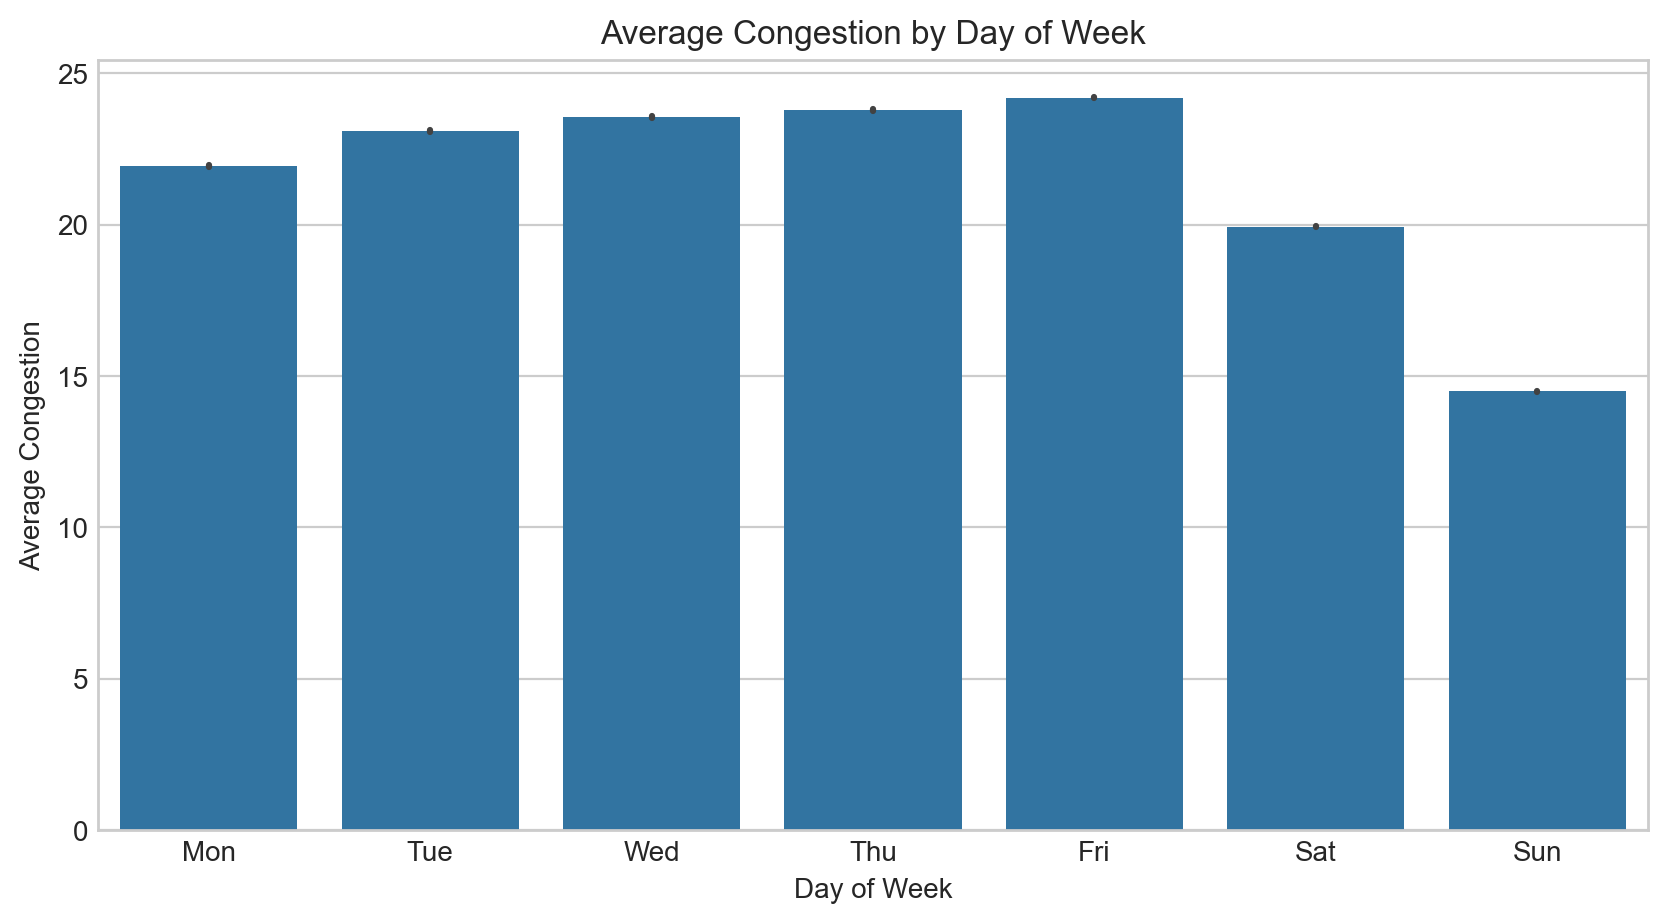

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='dayofweek', y='congestion', data=sub_df)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Congestion by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Congestion')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9220\3542726466.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='congestion', data=sub_df, estimator='mean', ci=None)


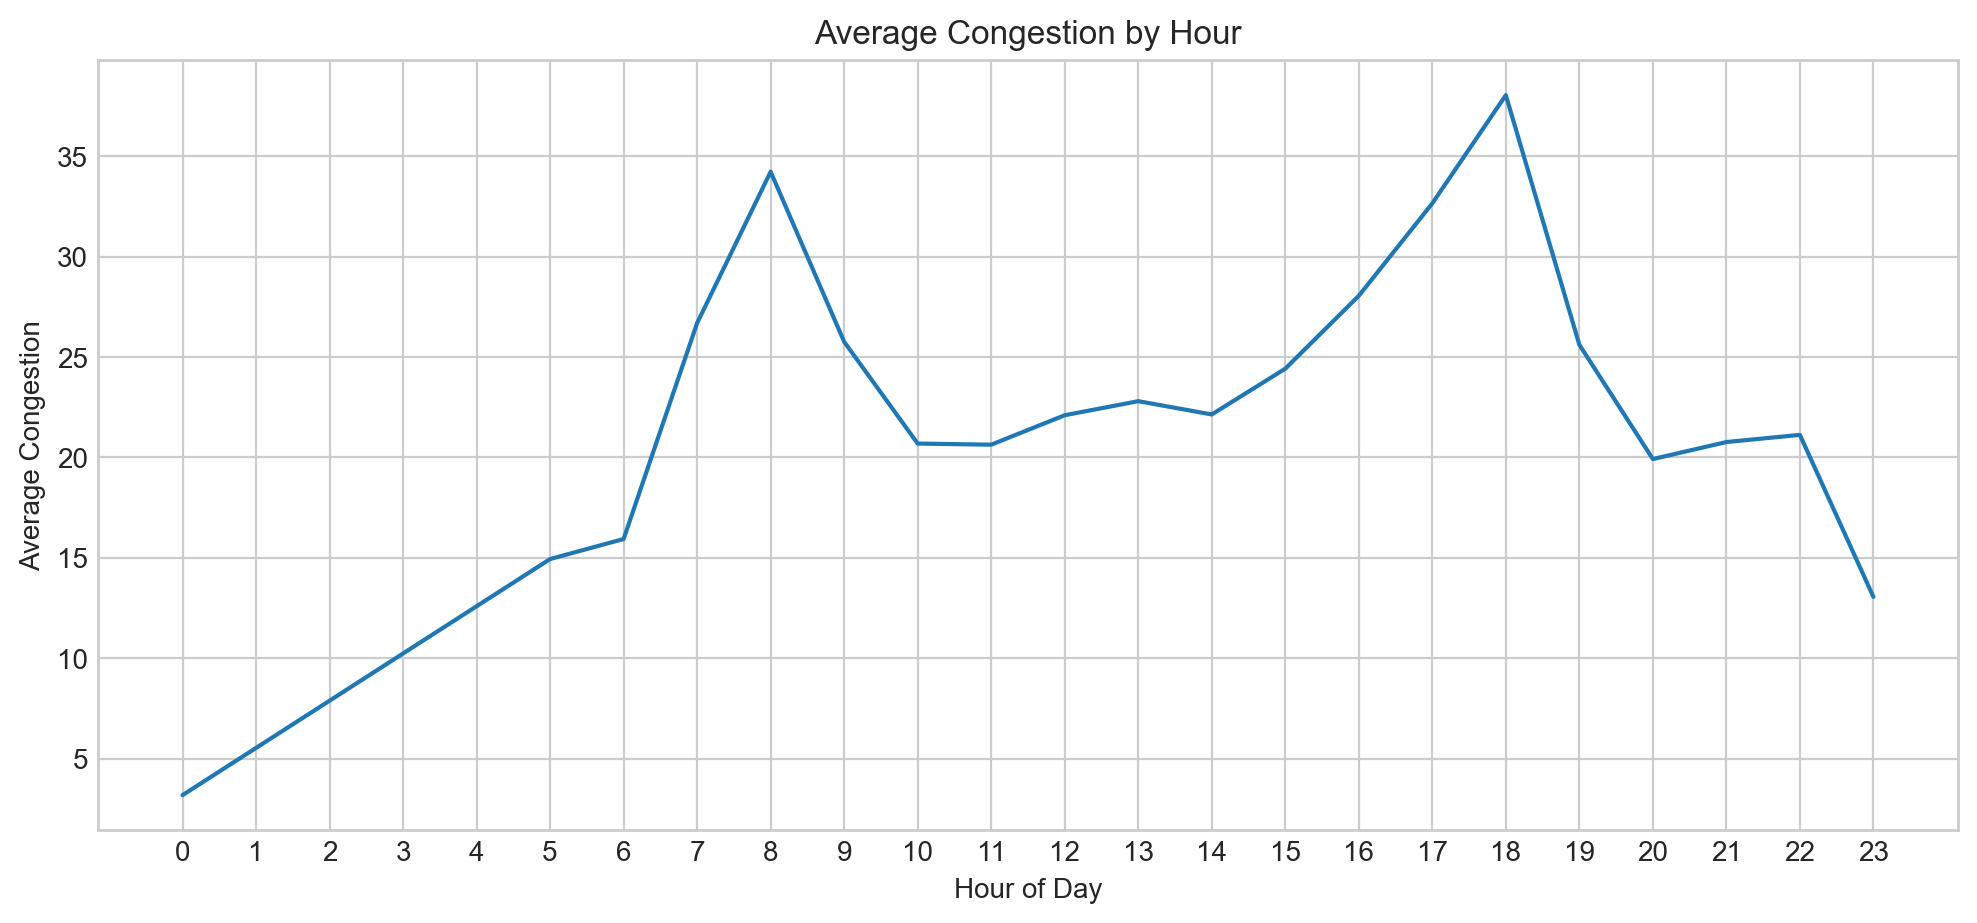

In [70]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='hour', y='congestion', data=sub_df, estimator='mean', ci=None)
plt.title('Average Congestion by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Congestion')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

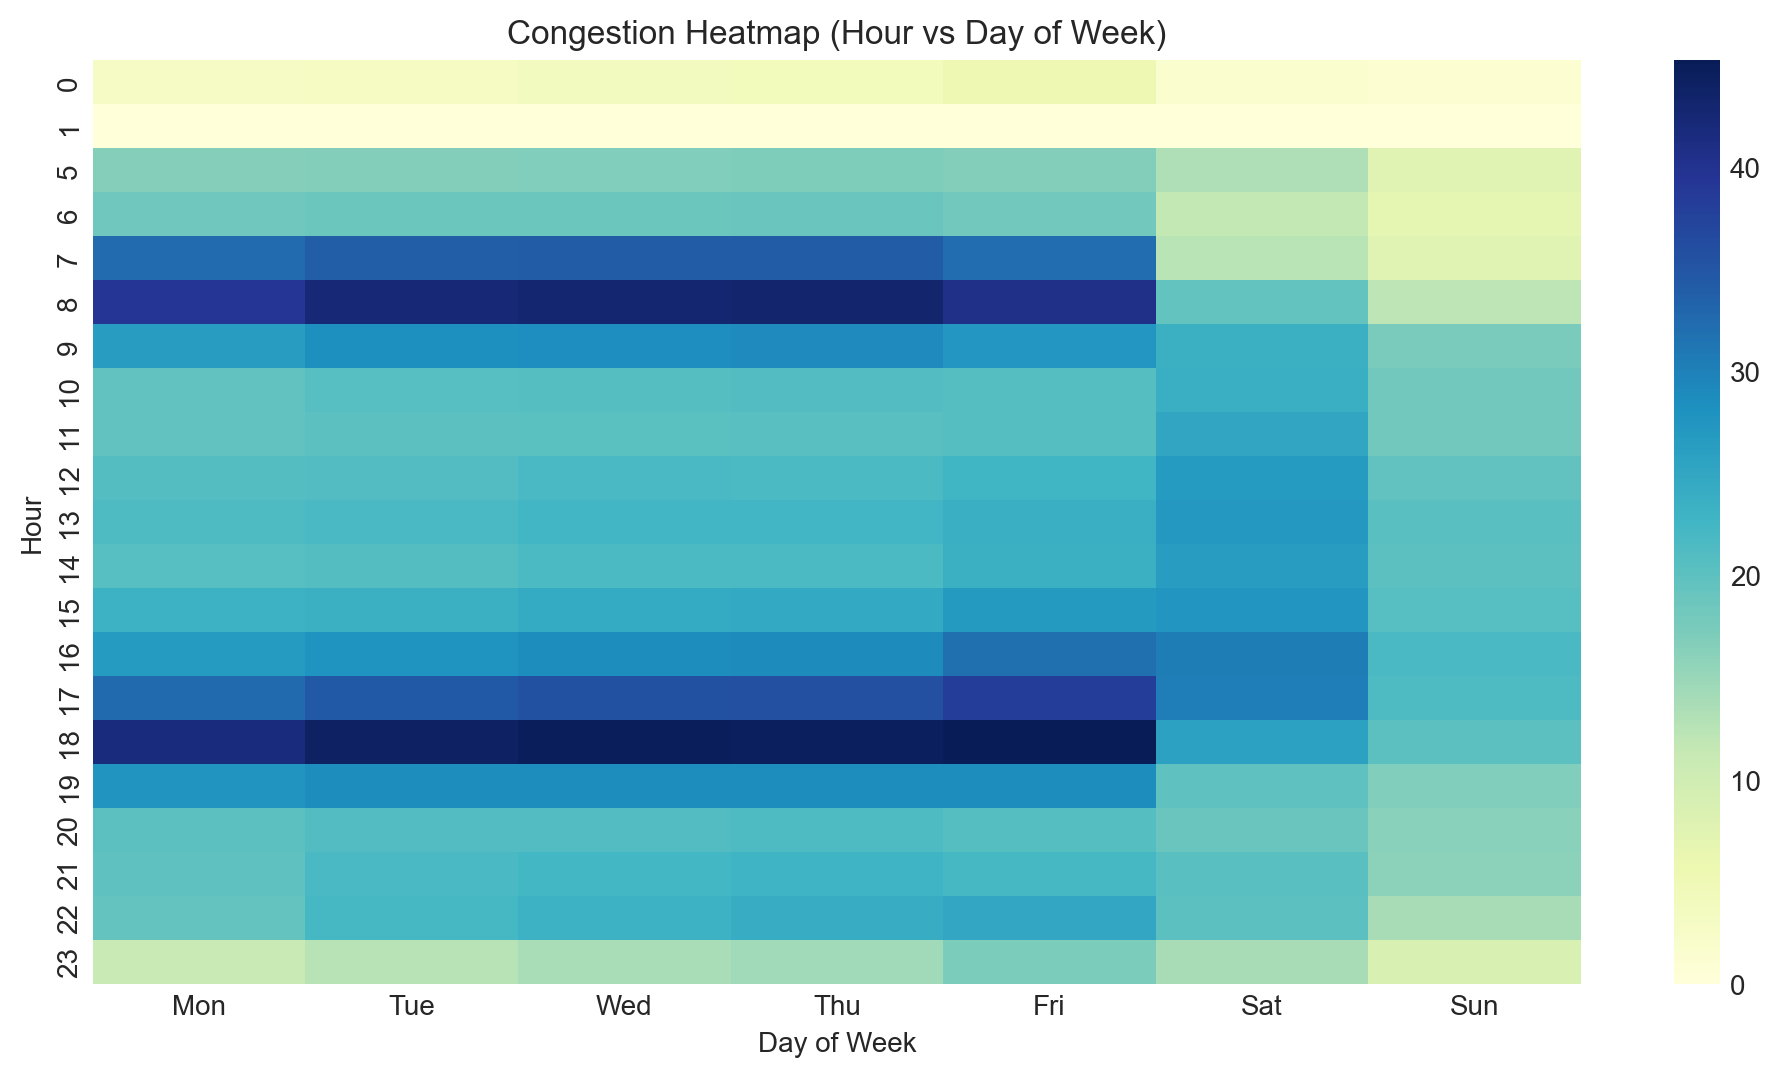

In [62]:
pivot_table = sub_df.pivot_table(
    index='hour',
    columns='dayofweek',
    values='congestion',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Congestion Heatmap (Hour vs Day of Week)')
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.show()


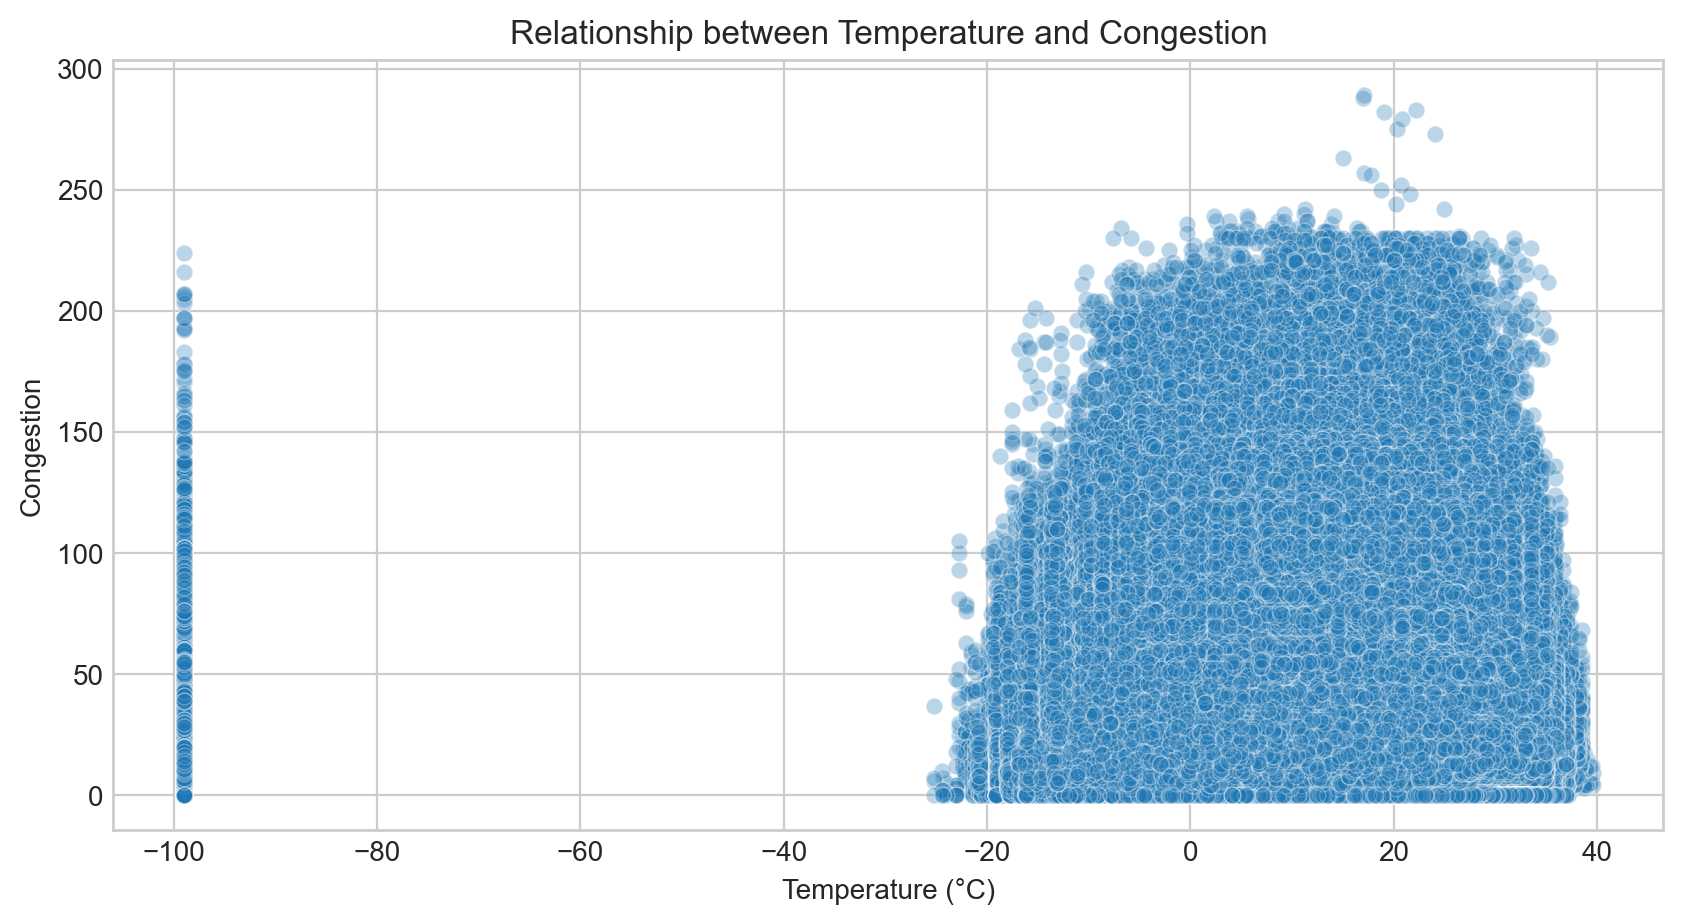

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ta', y='congestion', data=sub_df, alpha=0.3)
plt.title('Relationship between Temperature and Congestion')
plt.xlabel('Temperature (°C)')
plt.ylabel('Congestion')
plt.grid(True)
plt.show()


## 이상치 시각화

- ✅ 1. 혼잡도 (congestion) 이상치 시각화

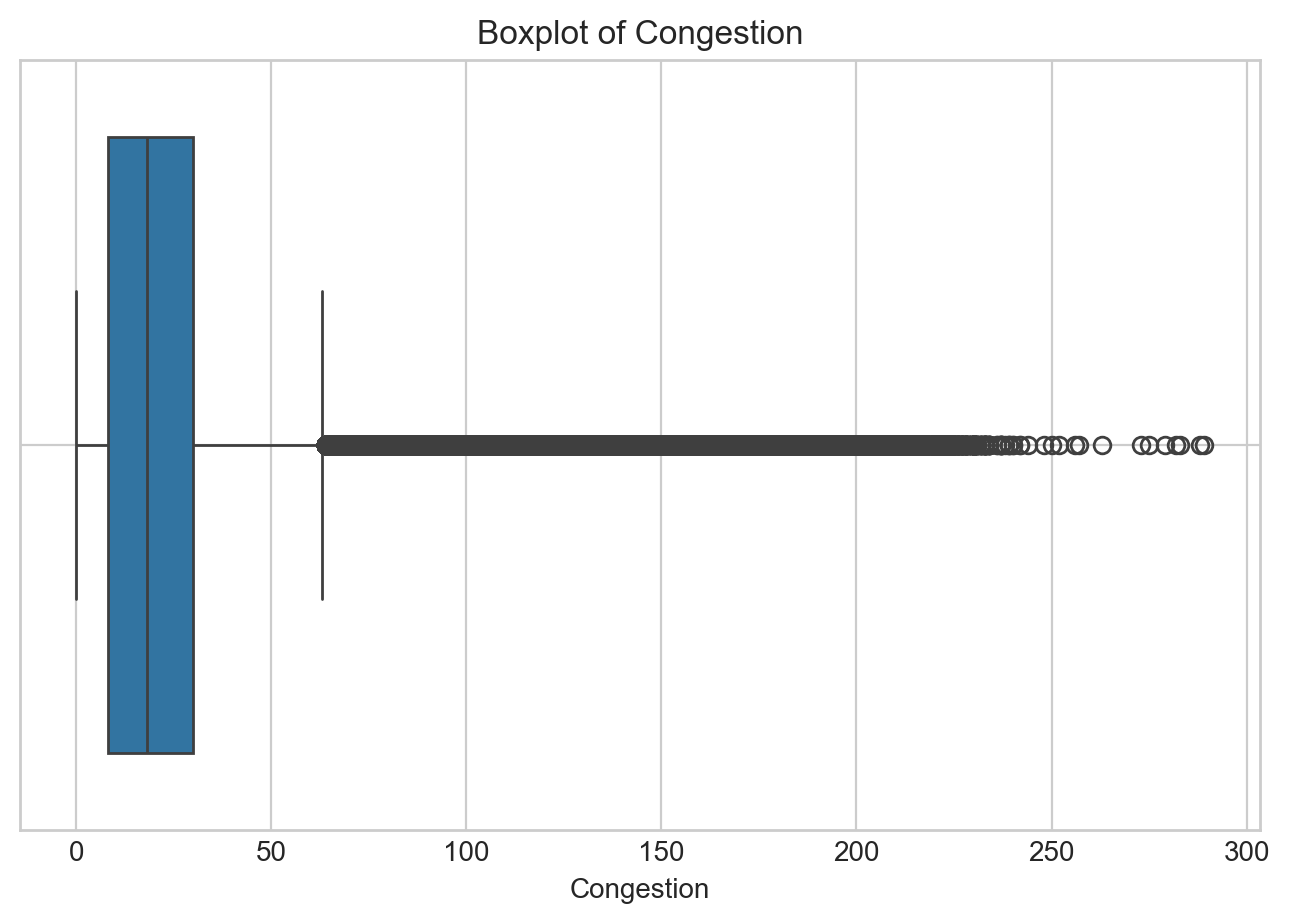

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sub_df['congestion'])
plt.title('Boxplot of Congestion')
plt.xlabel('Congestion')
plt.grid(True)
plt.show()

- ✅ 2. 기온 (ta) 이상치 시각화

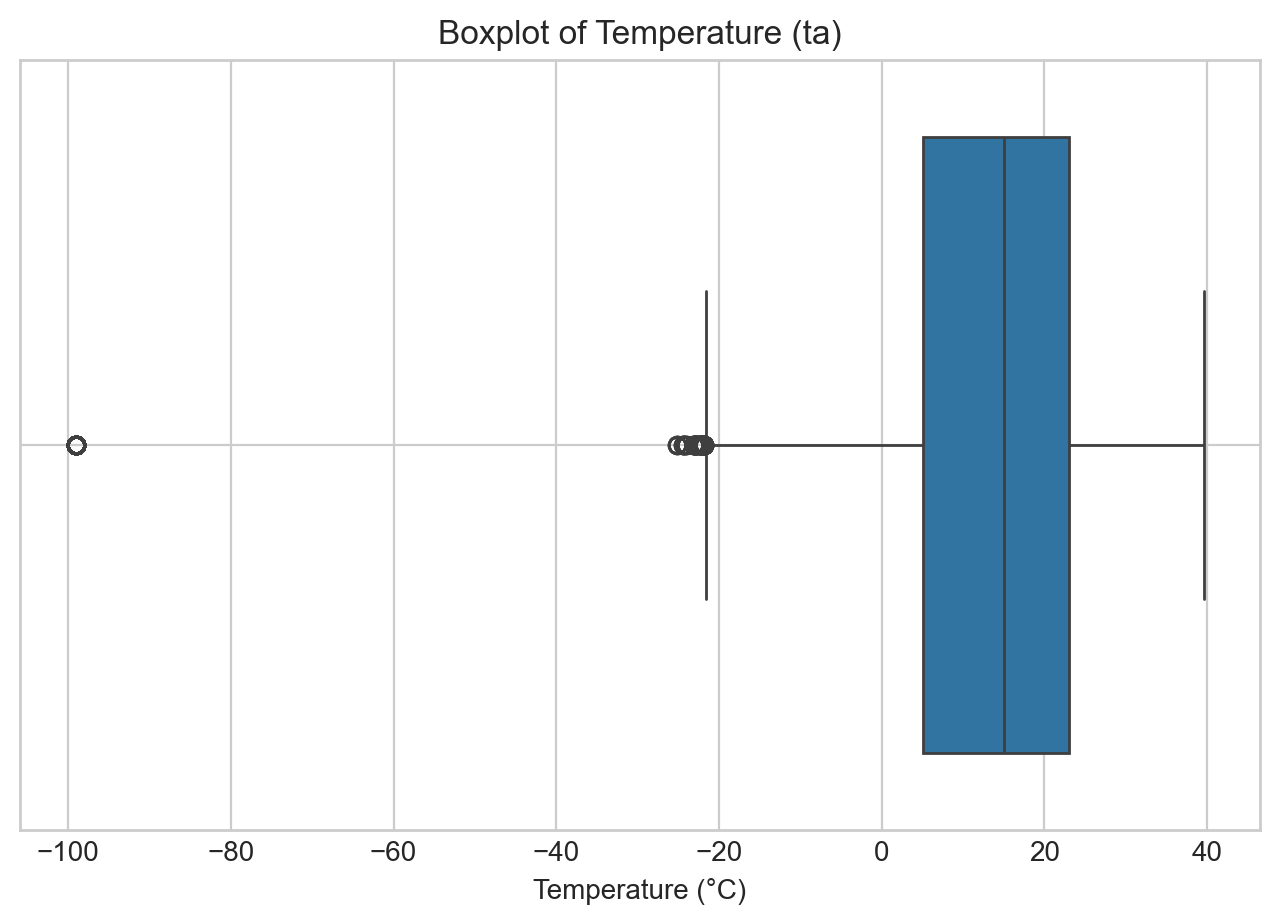

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sub_df['ta'])
plt.title('Boxplot of Temperature (ta)')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.show()

- ✅ 3. 풍속 (ws) 이상치 시각화

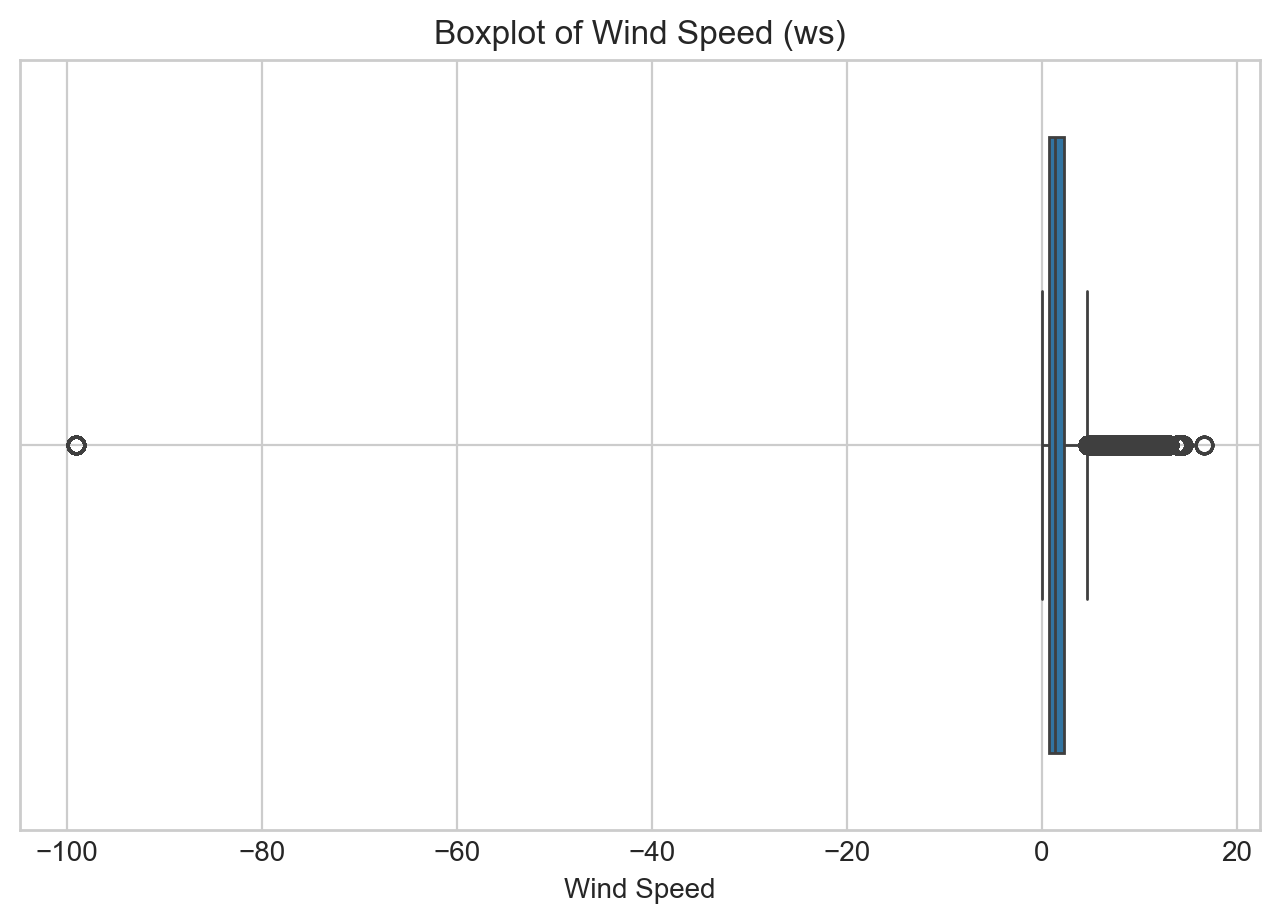

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sub_df['ws'])
plt.title('Boxplot of Wind Speed (ws)')
plt.xlabel('Wind Speed')
plt.grid(True)
plt.show()

- ✅ 4. 여러 변수 한 번에 이상치 확인 (subplots 활용)

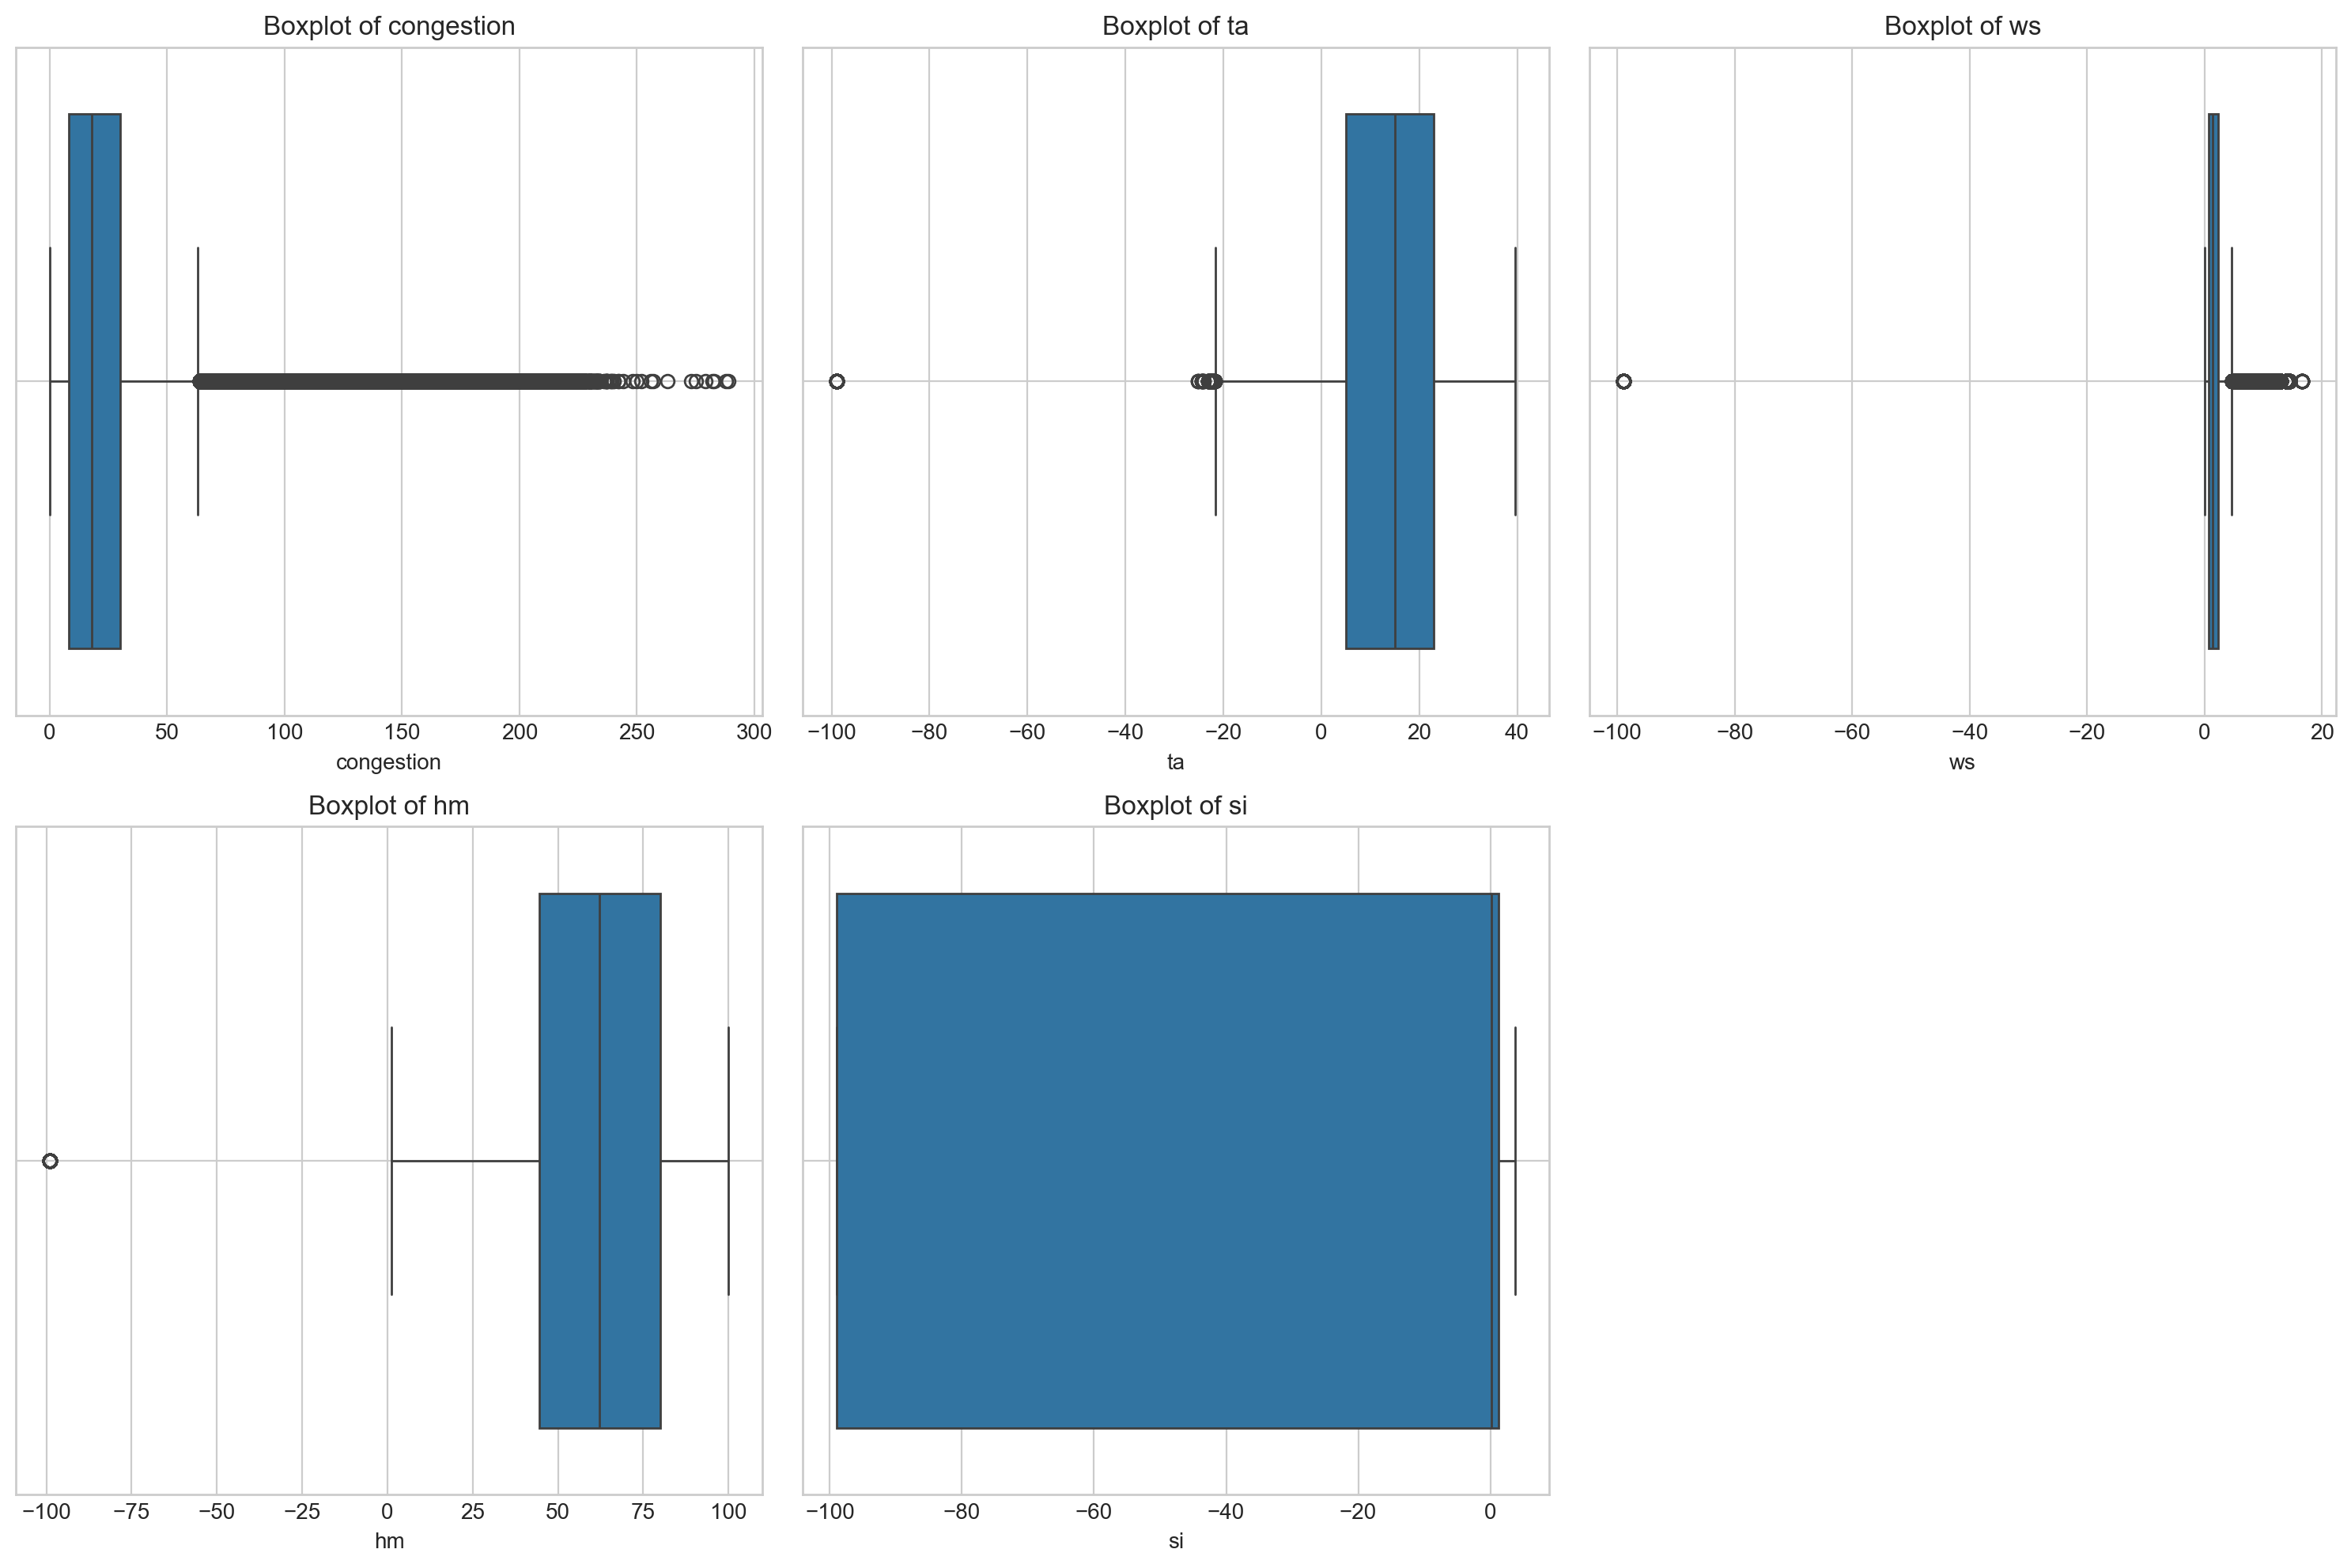

In [24]:
cols_to_plot = ['congestion', 'ta', 'ws', 'hm', 'si']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=sub_df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


<Axes: xlabel='congestion', ylabel='Count'>

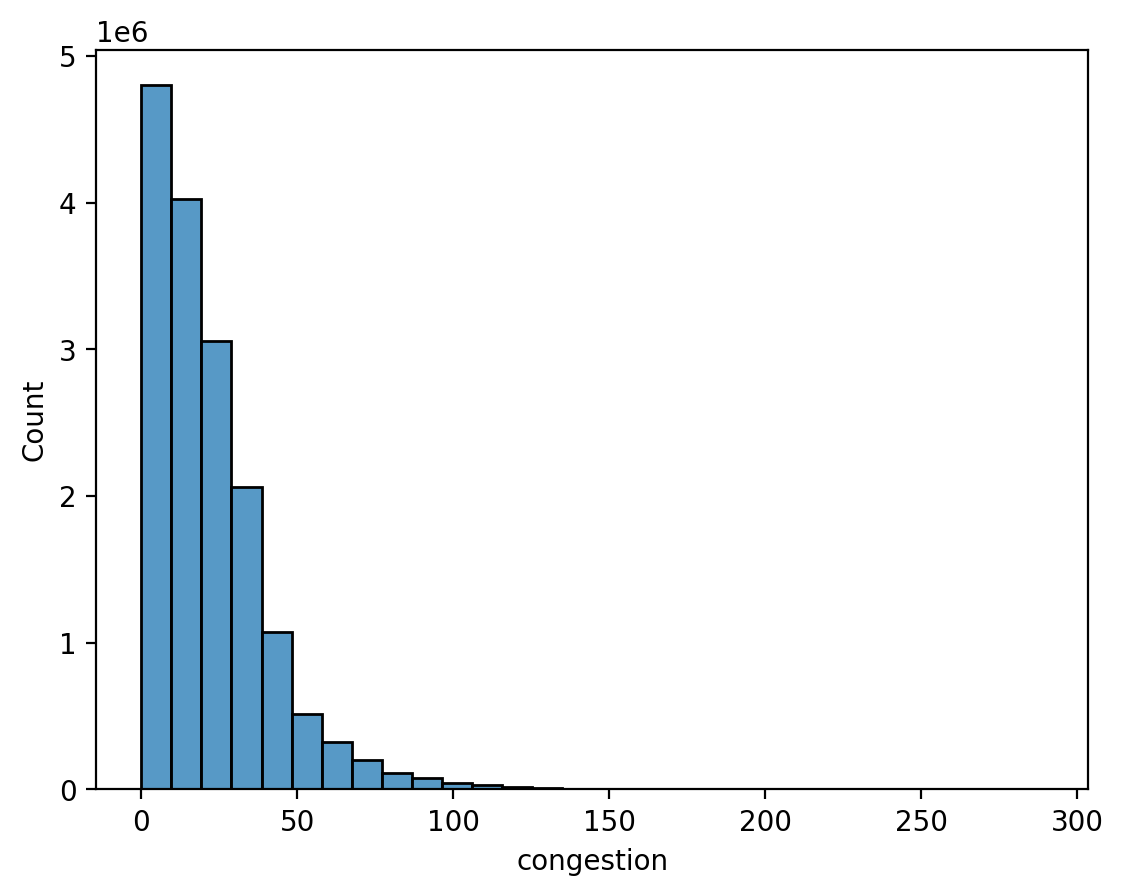

In [7]:
import seaborn as sns
sns.histplot(sub_df['congestion'], bins=30)

<Axes: xlabel='hour'>

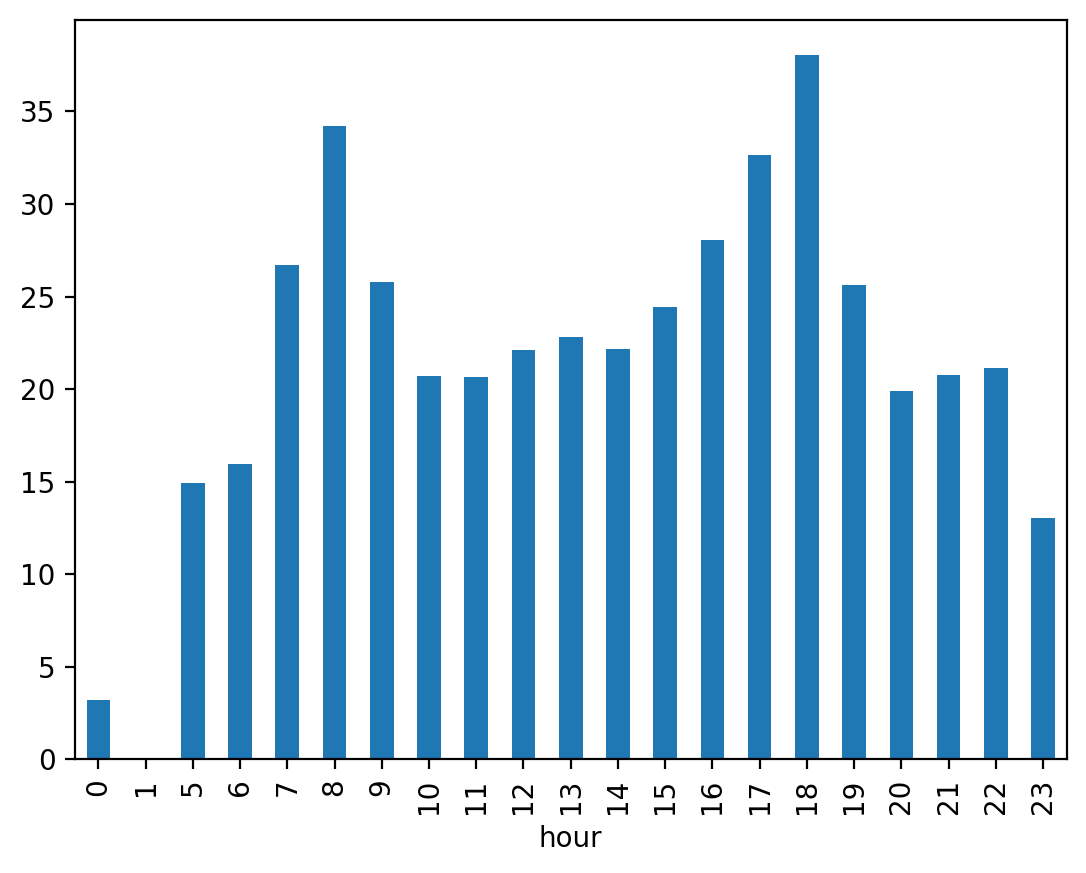

In [8]:
sub_df.groupby('hour')['congestion'].mean().plot(kind='bar')

In [63]:
filtered_df = sub_df[sub_df['hour'] == 1]

# 필터링된 데이터프레임에서 'congestion' 컬럼의 값들만 선택합니다.
congestion_values = filtered_df['congestion']

In [64]:
congestion_values

1          0
22         0
43         0
64         0
85         0
          ..
5520877    0
5520898    0
5520919    0
5520940    0
5520961    0
Name: congestion, Length: 779491, dtype: int64